# Classification Project
###### Willi Kristen

#### Herangehensweise an ein Klassifikationsproblem:
## Prediction of Customer Satisfaction

###### Data: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor

###### Laden der Trainingsdaten:

In [2]:
df_train = pd.read_csv("train_data.csv", index_col="Unnamed: 0")

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

###### Datenaufbereitung:
#### -Umwandeln der kategorischen- in numerische Werte (Dummyvariablen)
#### -Filtern redundanter Dummyvariablen
#### -Umwandeln falscher Datentypen

In [3]:
df_train = pd.get_dummies(df_train).drop(["id", "Gender_Female", 
                                          "Customer Type_disloyal Customer", 
                                          "Type of Travel_Personal Travel", 
                                          "Class_Eco Plus", 
                                          "satisfaction_neutral or dissatisfied"], 
                                         axis=1)
df_train["Arrival Delay in Minutes"] = df_train["Arrival Delay in Minutes"].fillna(0.0).astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

In [4]:
df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18,1,1,0,0,0,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6,1,0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0,0,1,1,1,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9,0,1,1,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0,1,1,1,1,0,1


#### Frage 1: Welche Features weisen in Bezug zu unserer Target Variable eine hohe Korrelation auf?

###### Überblick über Korrelationen durch einen Heat-Map Plot:

<AxesSubplot:>

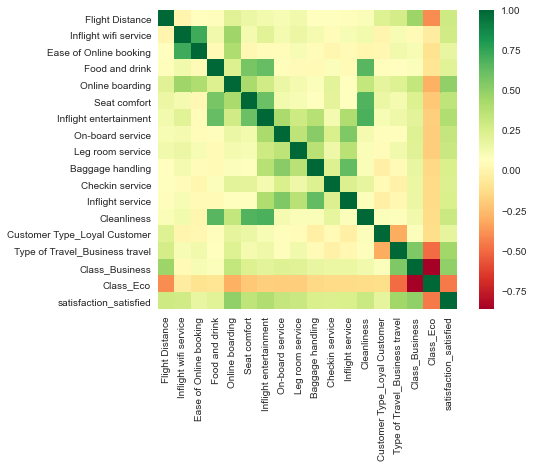

In [26]:
sns.heatmap(df_train.corr(), square=True, cmap="RdYlGn")

In [6]:
df_train = df_train.drop(["Gender_Male", 
                          "Gate location", 
                          "Age", 
                          "Departure/Arrival time convenient", 
                          "Departure Delay in Minutes", 
                          "Arrival Delay in Minutes"], 
                         axis=1)

###### Aufsplitten des Trainingssets in X (Features) und y (target):

In [7]:
X_train = df_train.drop("satisfaction_satisfied", axis=1); y_train = df_train["satisfaction_satisfied"].values

###### Vorbereiten der Features für die logistische Regression und Scalieren dieser.

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_logreg = scaler.transform(X_train)

###### Hyperparametertuning für einen Decision-Tree-Classifier:

In [9]:
param_grid_logreg = {'C': np.arange(0, 5, 0.1), 
                     'solver':['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}

logreg = LogisticRegression(random_state=21)
logreg_cv=GridSearchCV(logreg, param_grid_logreg, cv=5, n_jobs=-1)
logreg_cv.fit(X_train_logreg, y_train)

print("Der besten Parameter nach Hyperparametertuning: ",logreg_cv.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.87346978
 0.87346978 0.87350828 0.87349866 0.87347941 0.87350828 0.87350828
 0.87349866 0.87350828 0.87350828 0.87348903 0.87347941 0.87349866
 0.87347941 0.87348903 0.87347941 0.87346978 0.87349866 0.87348903
 0.87347941 0.87347941 0.87346978 0.87349866 0.87347941 0.87346978
 0.87347941 0.87346978 0.87347941 0.87347941 0.87346978 0.87347941
 0.87346978 0.87347941 0.87347941 0.87346978 0.87347941 0.87346978
 0.87347941 0.87348903 0.87346978 0.87347941 0.87346978 0.87347941
 0.87348903 0.87346978 0.87347941 0.87346978 0.87347941 0.87347941
 0.87346978 0.87347941 0.87346978 0.87347941 0.87348903 0.87346978
 0.87347941 0.87346978 0.87347941 0.87348903 0.87346978 0.87347941
 0.87346978 0.87347941 0.87347941 0.87346978 0.87347941 0.87346978
 0.87347941 0.87347941 0.87346978 0.87347941 0.873469

Der besten Parameter nach Hyperparametertuning:  {'C': 0.1, 'solver': 'liblinear'}


In [10]:
logreg = logreg_cv.best_estimator_
logreg.fit(X_train_logreg, y_train)

y_pred_prob_logreg = logreg.predict_proba(X_train_logreg)[:,1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_train, y_pred_prob_logreg)

###### Hyperparametertuning für unseren KNeighbors-Classifier:

In [11]:
param_grid_knn = {"n_neighbors": range(1, 10)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)

print("Die optimale Anzahl an 'Nachbarn' ist laut Hyperparametertuning: ", knn_cv.best_params_)

Die optimale Anzahl an 'Nachbarn' ist laut Hyperparametertuning:  {'n_neighbors': 5}


In [12]:
knn = knn_cv.best_estimator_
knn.fit(X_train, y_train)

y_pred_prob_knn = knn.predict_proba(X_train)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_pred_prob_knn)

###### Hyperparametertuning für einen Decision-Tree-Classifier:

In [15]:
max_depth = list(range(1, 21))
max_depth.append(None)
param_dist = {
            "max_depth": max_depth,
            "max_features": range(2, (len(X_train.columns)+1)),
            "min_samples_leaf": range(1, 10),
            "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier(random_state=21)
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, n_jobs=-1)
tree_cv.fit(X_train, y_train)

print("Die besten Parameter für unseren Entscheidungsbaum, laut Hyperparametertuning sind: ", tree_cv.best_params_)

Die besten Parameter für unseren Entscheidungsbaum, laut Hyperparametertuning sind:  {'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 14, 'criterion': 'gini'}


[Text(541.3437888654358, 1313.7, 'Online boarding <= 3.5\ngini = 0.491\nsamples = 103904\nvalue = [58879, 45025]\nclass = ['),
 Text(221.60919873703756, 1223.1, 'Inflight wifi service <= 0.5\ngini = 0.253\nsamples = 52429\nvalue = [44627, 7802]\nclass = ['),
 Text(136.53591823150225, 1132.5, 'Inflight entertainment <= 0.5\ngini = 0.009\nsamples = 1768\nvalue = [8, 1760]\nclass = 0'),
 Text(135.49331733464126, 1041.9, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = ['),
 Text(137.57851912836324, 1041.9, 'gini = 0.0\nsamples = 1760\nvalue = [0, 1760]\nclass = 0'),
 Text(306.68247924257287, 1132.5, 'Inflight wifi service <= 3.5\ngini = 0.21\nsamples = 50661\nvalue = [44619, 6042]\nclass = ['),
 Text(139.6637209220852, 1041.9, 'Class_Business <= 0.5\ngini = 0.121\nsamples = 45932\nvalue = [42949, 2983]\nclass = ['),
 Text(66.36806334080718, 951.3, 'Type of Travel_Business travel <= 0.5\ngini = 0.033\nsamples = 33036\nvalue = [32487, 549]\nclass = ['),
 Text(65.3254624439462, 860.7, 'gini

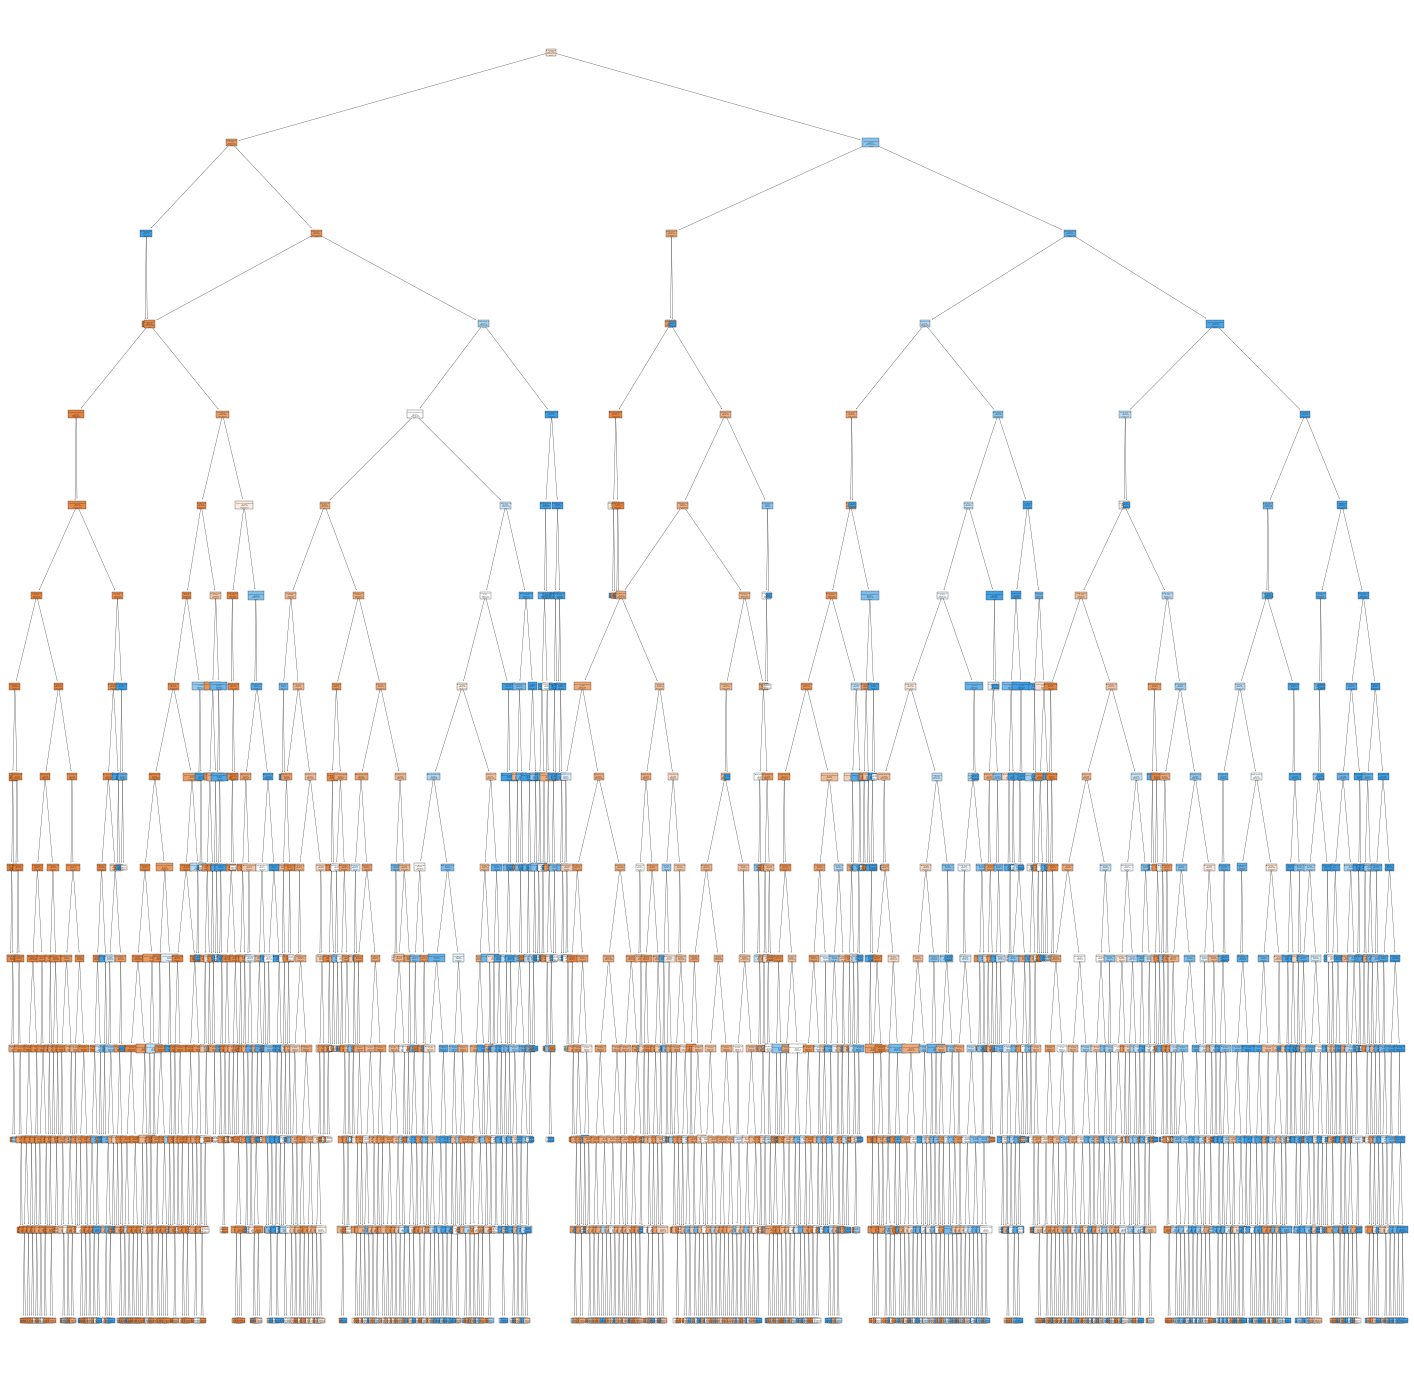

In [16]:
tree = tree_cv.best_estimator_ 
tree.fit(X_train, y_train)

y_pred_prob_tree = tree.predict_proba(X_train)[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, y_pred_prob_tree)

feature_names = list(X_train.columns)
class_names = list(str(np.unique(y_train)))

plt.figure(figsize=(25, 25))
plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True)

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Frage 2: Können wir vorhersagen, ob ein Kunde mit dem Service der AirLine zufrieden war/sein wird?

###### Zunächst, laden und "reinigen" der Testdaten:

In [17]:
df_test = pd.read_csv("test_data.csv", index_col="Unnamed: 0")
df_test = pd.get_dummies(df_test).drop(["id", "Gender_Male", "Gate location", "Age", "Departure/Arrival time convenient", "Departure Delay in Minutes", 
                                        "Arrival Delay in Minutes","Gender_Female", "Customer Type_disloyal Customer", "Type of Travel_Personal Travel", 
                                        "Class_Eco Plus", "satisfaction_neutral or dissatisfied"], axis=1)
X_test = df_test.drop("satisfaction_satisfied", axis=1); y_test = df_test["satisfaction_satisfied"].values

scaler.fit(X_test)
X_test_logreg = scaler.transform(X_test)

In [18]:
# Ansatz 1 (Logistic-Regression-Classifier):
y_pred_logreg = logreg.predict(X_test_logreg)
# Ansatz 2 (KNeighbors-Classifier):
y_pred_knn = knn.predict(X_test)
# Ansatz 3 (Decision-Tree-Classifier):
y_pred_tree = tree.predict(X_test)

# Testausgabe einer Ergebnisliste:
print(y_pred_tree)

[1 1 0 ... 0 1 0]


###### Überprüfen der Genauigkeit der Modelle anhand der Scores:

In [19]:
logreg.score(X_test_logreg, y_test)

0.8691869417924237

In [20]:
knn.score(X_test, y_test)

0.8562519248537112

In [21]:
tree.score(X_test, y_test)

0.9551124114567293

#### Antwort: Ja, je nach Modell können wir mit einer Wahrscheinhlichkeit von bis zu 94,61% vorhersagen ob ein Passagier zufrieden war/sein wird.
###### Erstellen einer roc-Kurve, für AUC als Metrik für unsere "Klassifikations-Grenze" und Plot:

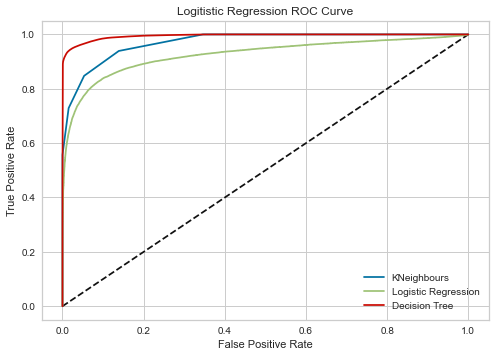

In [22]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_knn, tpr_knn, label="KNeighbours")
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logitistic Regression ROC Curve")
plt.legend()
plt.show()

###### Nun verschaffen wir uns noch einen besseren Überblick, über die Ergebnisse, per ClassificationReport & ConfusionsMatrix:

In [23]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



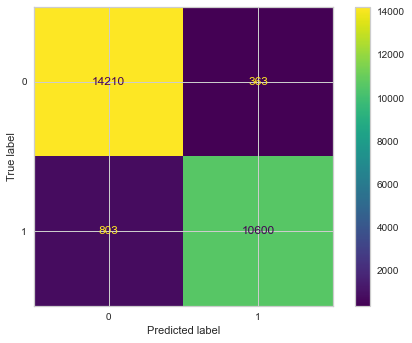

In [24]:
target_names = list(np.unique(y_train))

cm = confusion_matrix(y_test, y_pred_tree, labels=target_names)

cmd = ConfusionMatrixDisplay(cm, display_labels=target_names)
cmd.plot()

###### Hier sehen wir noch einmal die Relevanz der einzelnen Features, für das Ergebnis des Decision Trees, relativ zum wichtigsten Feature:

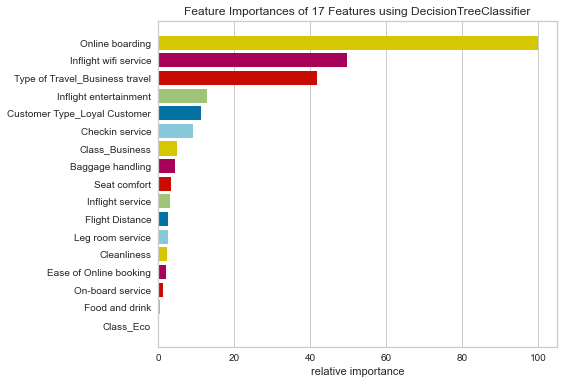

<AxesSubplot:title={'center':'Feature Importances of 17 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [25]:
fi = FeatureImportances(tree)
fi.fit(X_train, y_train)
fi.show()